# Final Assignment - Pick a Restaurant in Melbourne

In [1]:
import numpy as np 
import pandas as pd
import json
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium # map rendering library
from bs4 import BeautifulSoup, NavigableString, Tag
import re

print('Libraries imported.')

Libraries imported.


## Step 1 : Scraping the data from internet and parse it to the pandas dataframe

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_Melbourne_suburbs'

html_text =requests. get(url).text
soup = BeautifulSoup(html_text, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of Melbourne suburbs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"681061ce-351f-48fc-b761-954d9eef2c42","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_Melbourne_suburbs","wgTitle":"List of Melbourne suburbs","wgCurRevisionId":1006848636,"wgRevisionId":1006848636,"wgArticleId":745628,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Articles with short description","Short description is different from Wikidata

In [3]:
table_contents = []

for h3 in soup.find_all('h3'):
    if h3.text.split("[")[0] == 'City of Wyndham':
        for ul in h3.find_next_sibling("ul"):
            cell ={}
            if isinstance(ul, NavigableString):
                continue
            if isinstance(ul, Tag):
                #print(ul.text)
                #print('ok')
                #print(ul.get_text())
                #print('Suburb and ZIP :', ul.text)
                #print('Suburb:', (ul.text).split("\n")[0])
                #print('area :', (ul.text).split("\n")[1:])
                cell['City'] = (h3.span.text).split("[")[0]
                cell['Suburb'] = (ul.text).split("\n")[0]
                cell['area'] = (ul.text).split("\n")[1:]
                table_contents.append(cell)
        
        #print('h3',h3)
        break
    else:
        #print((h3.span.text).split("[")[0])
        
    #print(h3)
        for ul in h3.find_next_sibling("ul"):
            cell ={}
            if isinstance(ul, NavigableString):
                continue
            if isinstance(ul, Tag):
                #print(ul.text)
                #print('ok')
                #print(ul.get_text())
                #print('Suburb and ZIP :', ul.text)
                #print('Suburb:', (ul.text).split("\n")[0])
                #print('area :', (ul.text).split("\n")[1:])
                cell['City'] = (h3.span.text).split("[")[0]
                cell['Suburb'] = (ul.text).split("\n")[0]
                cell['area'] = (ul.text).split("\n")[1:]
                print(cell)
                print('ok')
                table_contents.append(cell)
            
#table_contents


{'City': 'City of Melbourne', 'Suburb': 'Carlton 3053', 'area': ['Carlton South']}
ok
{'City': 'City of Melbourne', 'Suburb': 'Carlton North 3054 (Shared with City of Yarra)', 'area': []}
ok
{'City': 'City of Melbourne', 'Suburb': 'Docklands 3008', 'area': []}
ok
{'City': 'City of Melbourne', 'Suburb': 'East Melbourne 3002', 'area': ['Jolimont  (the name of the railway station)']}
ok
{'City': 'City of Melbourne', 'Suburb': 'Flemington 3031 (Shared with City of Moonee Valley)', 'area': []}
ok
{'City': 'City of Melbourne', 'Suburb': 'Kensington 3031', 'area': []}
ok
{'City': 'City of Melbourne', 'Suburb': 'Melbourne 3000 (Central business district)', 'area': []}
ok
{'City': 'City of Melbourne', 'Suburb': 'Melbourne 3004 (St Kilda Road area, shared with City of Port Phillip)', 'area': []}
ok
{'City': 'City of Melbourne', 'Suburb': 'North Melbourne 3051 (Shared with City of Moonee Valley)', 'area': ['Hotham Hill', 'Macaulay (the name of the railway station)']}
ok
{'City': 'City of Melbourn

In [4]:
#table_contents
df=pd.DataFrame(table_contents)
df.head()    # It is missing rurual localities.
#print (type(df['area']))

,City,Suburb,area
0,City of Melbourne,Carlton 3053,[Carlton South]
1,City of Melbourne,Carlton North 3054 (Shared with City of Yarra),[]
2,City of Melbourne,Docklands 3008,[]
3,City of Melbourne,East Melbourne 3002,[Jolimont (the name of the railway station)]
4,City of Melbourne,Flemington 3031 (Shared with City of Moonee Va...,[]


In [5]:
df=pd.DataFrame(table_contents)
df.head(20)    # It is missing rurual localities.

df['Suburb']=df['Suburb'].str.replace(r'\s\(.*\)','')
df['PostalCode']=df['Suburb'].str[-4:]
df['Suburb']=df['Suburb'].str[:-5]

df['area'] = df['area'].astype(str).str[1:-1]  # remove the square brackets

df['area']=df['area'].str.replace(r'\s\(.*\)','')   # remove the comments in '()'


df['area']=df['area'].replace({'\'': ''}, regex=True)   # remove single quote sign
df['area']=df['area'].replace({'\"': ''}, regex=True)   # remove double quote sign
df.head(20)

<ipython-input-5-ea483d130947>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Suburb']=df['Suburb'].str.replace(r'\s\(.*\)','')
<ipython-input-5-ea483d130947>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['area']=df['area'].str.replace(r'\s\(.*\)','')   # remove the comments in '()'


,City,Suburb,area,PostalCode
0,City of Melbourne,Carlton,Carlton South,3053
1,City of Melbourne,Carlton North,,3054
2,City of Melbourne,Docklands,,3008
3,City of Melbourne,East Melbourne,Jolimont,3002
4,City of Melbourne,Flemington,,3031
5,City of Melbourne,Kensington,,3031
6,City of Melbourne,Melbourne,,3000
7,City of Melbourne,Melbourne,,3004
8,City of Melbourne,North Melbourne,"Hotham Hill, Macaulay",3051
9,City of Melbourne,Parkville,Royal Park,3052


In [6]:
# from itertools import chain

# # return list from series of comma-separated strings
# def chainer(s):
#     return list(chain.from_iterable(s.str.split(',')))

# # calculate lengths of splits
# lens = df['area'].str.split(',').map(len)

# # create new dataframe, repeating or chaining as appropriate
# res = pd.DataFrame({'City': np.repeat(df['City'], lens),
#                     'Suburb': np.repeat(df['Suburb'], lens),
#                     'PostalCode': np.repeat(df['PostalCode'], lens),
#                     'area': chainer(df['area'])})

# res=res.reset_index()
# res=res.drop(columns='index')

# res['area']=res['area'].replace({'\'': ''}, regex=True)   # remove single quote sign
# res['area']=res['area'].replace({'\"': ''}, regex=True)   # remove double quote sign

# #res['area'].fillna(res.Suburb, inplace=True)
# #res.loc[res['area'].isna(),'area'] = res['Suburb']
# res['area']=np.where(res['area']=='',res['Suburb'],res['area'])

# res.head(20)

## Step 2 : Use the folium and geocoder to generate the local map


In [7]:
import geocoder # import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

latitude=[]
longitude=[]
for code in df['Suburb']:
    g = geocoder.arcgis('{}, Melbourne, VIC'.format(code))
    print(code, g.latlng)
    while (g.latlng is None):
        g = geocoder.arcgis('{}, Melbourne, VIC'.format(code))
        print(code, g.latlng)
    latlng = g.latlng
    latitude.append(latlng[0])
    longitude.append(latlng[1])

Carlton [-37.80100999999996, 144.96951]
Carlton North [-37.78917999999993, 144.97188000000006]
Docklands [-37.81925999999993, 144.94555000000003]
East Melbourne [-37.81131999999997, 144.9779900000001]
Flemington [-37.78813999999994, 144.92965000000004]
Kensington [-37.794209999999964, 144.92754000000002]
Melbourne [-37.81738999999993, 144.96751000000006]
Melbourne [-37.81738999999993, 144.96751000000006]
North Melbourne [-37.800539999999955, 144.94609000000003]
Parkville [-37.79273999999998, 144.95825000000002]
Port Melbourne [-37.833009999999945, 144.92434000000003]
Southbank [-37.82523999999995, 144.96093000000008]
South Wharf [-37.825909999999965, 144.9515100000001]
South Yarra [-37.83911999999998, 144.9927100000001]
West Melbourne [-37.80670999999995, 144.9503800000001]
Albert Park [-37.84403999999995, 144.95126000000005]
Balaclava [-37.86902999999995, 144.99565000000007]
Elwood [-37.88238999999993, 144.98426000000006]
Melbourne [-37.81738999999993, 144.96751000000006]
Middle Park 

Croydon North [-37.76869999999997, 145.29803000000004]
Croydon South [-37.81352999999996, 145.28802000000007]
Heathmont [-37.829069999999945, 145.24540000000002]
Kilsyth [-37.80264999999997, 145.31500000000005]
Kilsyth South [-37.818179999999984, 145.31653000000006]
Park Orchards [-37.77899999999994, 145.2178600000001]
Ringwood [-37.81568999999996, 145.22750000000008]
Ringwood East [-37.808209999999974, 145.2509100000001]
Ringwood North [-37.787469999999985, 145.23772000000008]
Vermont [-37.836149999999975, 145.19524]
Warranwood [-37.77398999999997, 145.2482900000001]
Wonga Park [-37.73581999999993, 145.2715700000001]
Blackburn [-37.81777999999997, 145.1541400000001]
Blackburn North [-37.80034999999998, 145.14469000000008]
Blackburn South [-37.839129999999955, 145.14652]
Box Hill [-37.81745999999998, 145.12404000000004]
Box Hill North [-37.80187999999998, 145.12682000000007]
Box Hill South [-37.83782999999994, 145.12017000000003]
Burwood [-37.84949999999998, 145.12017000000003]
Burwood

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Hampton Park None
Hampton Park [-38.03388999999993, 145.26574000000005]
Junction Village [-38.13432999999998, 145.29483000000005]
Lyndhurst [-38.06315999999998, 145.24432000000002]
Lynbrook [-38.05302999999998, 145.25312000000008]
Narre Warren [-38.02036999999996, 145.30609000000004]
Narre Warren North [-37.98013999999995, 145.29979000000003]
Narre Warren South [-38.06305999999995, 145.29953000000012]
Dandenong [-37.98526999999996, 145.2179400000001]
Dandenong North [-37.95420999999993, 145.21402000000012]
Dandenong South [-38.01232999999996, 145.20595000000003]
Keysborough [-37.992339999999956, 145.1754400000001]
Noble Park [-37.96696999999995, 145.1899800000001]
Noble Park North [-37.94745999999998, 145.19180000000006]
Springvale [-37.94751999999994, 145.1531500000001]
Springvale South [-37.978549999999984, 145.1472500000001]
Carrum Downs [-38.10092999999995, 145.1829100000001]
Frankston [-38.14117999999996, 145.1217600000001]
Frankston North [-38.11791999999997, 145.15933000000007]


Hillside [-37.68856999999997, 144.74518000000012]
Kurunjang [-37.81738999999993, 144.96751000000006]
Melton [-37.70052582029245, 144.7963304371742]
Melton South [-37.70052582029245, 144.7963304371742]
Melton West [-37.70052582029245, 144.7963304371742]
Mount Cottrell [-38.061567627119004, 145.25817512923157]
Parwan [-37.75058994896271, 144.74112007522075]
Plumpton [-37.59739456772357, 144.93639965791246]
Ravenhall [-37.75821999999994, 144.74354000000005]
Rockbank [-37.77777854531052, 144.80201654867443]
Stratht [-37.81738999999993, 144.96751000000006]
Taylors [-37.88856219401982, 145.2464650595777]
Thornhill [-37.72488409410066, 144.80183594743008]
Toolern Vale [-37.60735999999997, 144.59023000000002]
Truganina [-37.852089999999976, 144.72399000000007]
Weir  [-37.68238927846743, 145.07582638994654]
Aberfeldie [-37.75932999999998, 144.8958]
Airport West [-37.711869999999976, 144.88697000000002]
Ascot Vale [-37.77545999999995, 144.91556000000003]
Avondale Heights [-37.76718999999997, 144

In [8]:
df['Latitude'] = latitude
df['Longitude'] = longitude
df.head(20)

,City,Suburb,area,PostalCode,Latitude,Longitude
0,City of Melbourne,Carlton,Carlton South,3053,-37.80101,144.96951
1,City of Melbourne,Carlton North,,3054,-37.78918,144.97188
2,City of Melbourne,Docklands,,3008,-37.81926,144.94555
3,City of Melbourne,East Melbourne,Jolimont,3002,-37.81132,144.97799
4,City of Melbourne,Flemington,,3031,-37.78814,144.92965
5,City of Melbourne,Kensington,,3031,-37.79421,144.92754
6,City of Melbourne,Melbourne,,3000,-37.81739,144.96751
7,City of Melbourne,Melbourne,,3004,-37.81739,144.96751
8,City of Melbourne,North Melbourne,"Hotham Hill, Macaulay",3051,-37.80054,144.94609
9,City of Melbourne,Parkville,Royal Park,3052,-37.79274,144.95825


In [9]:
address = 'Melbourne, VIC'

geolocator = Nominatim(user_agent="Suburb_Melbourne_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Melbourne are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Melbourne are -37.8142176, 144.9631608.


In [10]:
# create map of Manhattan using latitude and longitude values
map_Melbourne = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, suburb, neighborhood in zip(df['Latitude'], df['Longitude'], df['Suburb'], df['area']):
    label = '{}, {}'.format(neighborhood, suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Melbourne)  
    
map_Melbourne

In [11]:
# Local_data = res[res['City'] == 'City of Melbourne'].reset_index(drop=True)
# Local_data
Local_data = df
Local_data

,City,Suburb,area,PostalCode,Latitude,Longitude
0,City of Melbourne,Carlton,Carlton South,3053,-37.80101,144.96951
1,City of Melbourne,Carlton North,,3054,-37.78918,144.97188
2,City of Melbourne,Docklands,,3008,-37.81926,144.94555
3,City of Melbourne,East Melbourne,Jolimont,3002,-37.81132,144.97799
4,City of Melbourne,Flemington,,3031,-37.78814,144.92965
...,...,...,...,...,...,...
412,City of Wyndham,Truganina,,3029,-37.85209,144.72399
413,City of Wyndham,Werribee,"Brophys Crossing, Mossfield",3030,-37.90319,144.66054
414,City of Wyndham,Werribee South,,3030,-37.91207,144.68203
415,City of Wyndham,Williams Landing,Williams RAAF,3027,-37.85740,144.73788


In [12]:
# address = 'City of Melbourne, Melbourne'

# geolocator = Nominatim(user_agent="City_of_Melbourne")
# location = geolocator.geocode(address)
# latitude = location.latitude
# longitude = location.longitude
# print('The geograpical coordinate of City of Melbourne are {}, {}.'.format(latitude, longitude))

In [13]:
# # create map of Manhattan using latitude and longitude values
# map_City_of_Melbourne = folium.Map(location=[latitude, longitude], zoom_start=13)

# # add markers to map
# for lat, lng, suburb, neighborhood in zip(Local_data['Latitude'], Local_data['Longitude'], Local_data['Suburb'], Local_data['area']):
#     label = '{}, {}'.format(neighborhood, suburb)
#     label = folium.Popup(label, parse_html=True)
#     folium.CircleMarker(
#         [lat, lng],
#         radius=5,
#         popup=label,
#         color='blue',
#         fill=True,
#         fill_color='#3186cc',
#         fill_opacity=0.7,
#         parse_html=False).add_to(map_City_of_Melbourne)  
    
# map_City_of_Melbourne

# Step 3 Use Foursquare data to study the venues of the local suburbs

In [14]:
CLIENT_ID = 'MJDQMV351W4LKAO3XY5M2E1KBTPHQ0YFR3GJTSBDBHKQDSTE' # your Foursquare ID
CLIENT_SECRET = '2021GFSKHLSSDNMZGT50A3UNMI2S1PY53SL1CAH0XKKEPQ1Y' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MJDQMV351W4LKAO3XY5M2E1KBTPHQ0YFR3GJTSBDBHKQDSTE
CLIENT_SECRET:2021GFSKHLSSDNMZGT50A3UNMI2S1PY53SL1CAH0XKKEPQ1Y


In [15]:
Local_data.loc[0, 'Suburb']


'Carlton'

In [16]:
neighborhood_latitude = Local_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Local_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Local_data.loc[0, 'Suburb'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Carlton are -37.80100999999996, 144.96951.


In [17]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=MJDQMV351W4LKAO3XY5M2E1KBTPHQ0YFR3GJTSBDBHKQDSTE&client_secret=2021GFSKHLSSDNMZGT50A3UNMI2S1PY53SL1CAH0XKKEPQ1Y&v=20180605&ll=-37.80100999999996,144.96951&radius=500&limit=1000'

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '607acc2f83232e75fc74e2d4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Carlton',
  'headerFullLocation': 'Carlton, Melbourne',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 52,
  'suggestedBounds': {'ne': {'lat': -37.79650999549996,
    'lng': 144.97519453508994},
   'sw': {'lat': -37.805510004499965, 'lng': 144.9638254649101}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b0b8439f964a520053223e3',
       'name': 'D.O.C. Pizza & Mozzarella Bar',
       'location': {'address': '295 Drummond St',
        'crossStreet': 'at Faraday St',
        'lat': -37.798954,
        'lng': 144.96849,
        'labeledLatLngs': [{'lab

In [19]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-20-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,D.O.C. Pizza & Mozzarella Bar,Pizza Place,-37.798954,144.968490
1,Carlton Wine Room,Wine Bar,-37.798584,144.968610
2,Baker D. Chirico,Bakery,-37.798788,144.968499
3,Gewürzhaus,Gourmet Shop,-37.799050,144.967480
4,Assembly Coffee & Tea,Coffee Shop,-37.802750,144.967290


In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

52 venues were returned by Foursquare.


In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
Local_venues = getNearbyVenues(names=Local_data['Suburb'],
                                   latitudes=Local_data['Latitude'],
                                   longitudes=Local_data['Longitude']
                                  )

Carlton
Carlton North
Docklands
East Melbourne
Flemington
Kensington
Melbourne
Melbourne
North Melbourne
Parkville
Port Melbourne
Southbank
South Wharf
South Yarra
West Melbourne
Albert Park
Balaclava
Elwood
Melbourne
Middle Park
Port Melbourne
Ripponlea
St Kilda
St Kilda East
St Kilda West
Southbank
South Melbourne
South Wharf
Abbotsford
Alphington
Burnley
Carlton North
Clifton Hill
Collingwood
Cremorne
Fairfield
Fitzroy
Fitzroy North
Princes Hill
Richmond
Bellfield
Briar Hill
Bundoora
Eaglemont
Eltham
Eltham North
Greensborough
Heidelberg
Heidelberg Heights
Heidelberg West
Ivanhoe
Ivanhoe East
Lower Plenty
Macleod
Montmorency
Rosanna
St Helena
Viewbank
Watsonia
Watsonia North
Yallambie
Alphington
Bundoora
Coburg
Coburg North
Fairfield
Kingsbury
Macleod
Northcote
Preston
Reservoir
Thornbury

Attwood
Broadmeadows
Campbellfield
Coolaroo
Craigieburn
Dallas
Gladstone Park
Greenvale
Jacana
Keilor
Meadow Heights
Melbourne Airport
Roxburgh Park
Somerton
Tullamarine
Westmeadows
Sunbury
Brunsw

In [24]:
print(Local_venues.shape)
Local_venues.head()

(5899, 7)


,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Carlton,-37.80101,144.96951,D.O.C. Pizza & Mozzarella Bar,-37.798954,144.968490,Pizza Place
1,Carlton,-37.80101,144.96951,Carlton Wine Room,-37.798584,144.968610,Wine Bar
2,Carlton,-37.80101,144.96951,Baker D. Chirico,-37.798788,144.968499,Bakery
3,Carlton,-37.80101,144.96951,Gewürzhaus,-37.799050,144.967480,Gourmet Shop
4,Carlton,-37.80101,144.96951,Assembly Coffee & Tea,-37.802750,144.967290,Coffee Shop


In [25]:
print('There are {} uniques categories.'.format(len(Local_venues['Venue Category'].unique())))

There are 332 uniques categories.


In [26]:
Local_venues.groupby('Suburb').count()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
,100,100,100,100,100,100
Abbotsford,22,22,22,22,22,22
Aberfeldie,2,2,2,2,2,2
Ai,100,100,100,100,100,100
Airport West,25,25,25,25,25,25
...,...,...,...,...,...,...
Windsor,52,52,52,52,52,52
Wonga Park,6,6,6,6,6,6
Wyndham Vale,3,3,3,3,3,3


In [27]:
print("The Venue Categories are", Local_venues['Venue Category'].unique())


The Venue Categories are ['Pizza Place' 'Wine Bar' 'Bakery' 'Gourmet Shop' 'Coffee Shop'
 'Frozen Yogurt Shop' 'Dessert Shop' 'Museum' 'Deli / Bodega'
 'Indie Theater' 'Ice Cream Shop' 'Movie Theater' 'Italian Restaurant'
 'Vegetarian / Vegan Restaurant' 'Bookstore' 'Indie Movie Theater' 'Café'
 'Cheese Shop' 'Egyptian Restaurant' 'Bar' 'Monument / Landmark'
 'Thai Restaurant' 'Burger Joint' 'Hookah Bar' 'Yunnan Restaurant'
 'Japanese Restaurant' 'French Restaurant' 'Asian Restaurant'
 'Vietnamese Restaurant' 'Lebanese Restaurant' 'Pub' 'Gastropub' 'Hotel'
 'Park' 'Grocery Store' 'Tram Station' 'Restaurant'
 'Australian Restaurant' 'Dog Run' 'Chinese Restaurant'
 'Gym / Fitness Center' 'BBQ Joint' 'Indian Restaurant' 'Cosmetics Shop'
 'Wine Shop' 'Supermarket' 'Breakfast Spot' 'Shoe Store' 'Cocktail Bar'
 'Chiropractor' 'Argentinian Restaurant' 'Record Shop' 'Fish & Chips Shop'
 'Middle Eastern Restaurant' 'Sculpture Garden' 'Steakhouse' 'Building'
 'Stadium' 'German Restaurant' 'Salad

In [28]:
Local_venues['Venue Category']
Local_res = Local_venues[Local_venues['Venue Category'].str.contains("Restaurant")==True]
Local_res = Local_res[Local_venues['Venue Category'] != "Restaurant"]


#print("The Venue Categories are", Local_res['Venue Category'].unique())
res_ct=Local_res.groupby('Venue Category').count()
res_ct=res_ct.sort_values(by='Suburb', ascending = False)
res_ct=res_ct.reset_index()
res_ct.head(25)

<ipython-input-28-2875c09f51ea>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Local_res = Local_res[Local_venues['Venue Category'] != "Restaurant"]


,Venue Category,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude
0,Italian Restaurant,141,141,141,141,141,141
1,Fast Food Restaurant,118,118,118,118,118,118
2,Asian Restaurant,96,96,96,96,96,96
3,Thai Restaurant,92,92,92,92,92,92
4,Vietnamese Restaurant,78,78,78,78,78,78
5,Japanese Restaurant,77,77,77,77,77,77
6,Chinese Restaurant,72,72,72,72,72,72
7,Australian Restaurant,65,65,65,65,65,65
8,Indian Restaurant,60,60,60,60,60,60
9,Portuguese Restaurant,58,58,58,58,58,58


<AxesSubplot:xlabel='Venue Category'>

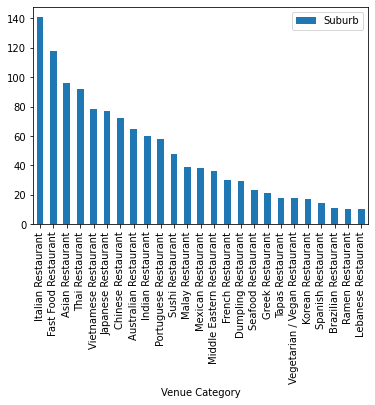

In [29]:
import matplotlib.pyplot as plt
res_topct=res_ct.head(25)
res_topct.plot(x ='Venue Category', y ='Suburb',kind = 'bar')


In [30]:
# Analysis Each Suburb by ONE HOT ENCODING

In [31]:
# one hot encoding
Local_onehot = pd.get_dummies(Local_res[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Local_onehot['Suburb'] = Local_res['Suburb'] 

# move neighborhood column to the first column
fixed_columns = [Local_onehot.columns[-1]] + list(Local_onehot.columns[:-1])
Local_onehot = Local_onehot[fixed_columns]

Local_onehot.head()

,Suburb,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,...,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Yunnan Restaurant
12,Carlton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,Carlton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17,Carlton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,Carlton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,Carlton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
Local_onehot.shape

(1329, 68)

In [33]:
Local_grouped = Local_onehot.groupby('Suburb').mean().reset_index()
Local_grouped

,Suburb,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,...,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Yunnan Restaurant
0,,0.0,0.000000,0.0,0.0,0.190476,0.095238,0.0,0.047619,0.0,...,0.0,0.0,0.047619,0.047619,0.0,0.0,0.0,0.047619,0.0,0.0
1,Abbotsford,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,Ai,0.0,0.000000,0.0,0.0,0.190476,0.095238,0.0,0.047619,0.0,...,0.0,0.0,0.047619,0.047619,0.0,0.0,0.0,0.047619,0.0,0.0
3,Airport West,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,Albert Park,0.0,0.000000,0.0,0.0,0.076923,0.076923,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.076923,0.0,0.0,0.0,0.076923,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,West Melbourne,0.0,0.090909,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
207,Westmeadows,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
208,Williamstown,0.0,0.000000,0.0,0.0,0.000000,0.090909,0.0,0.000000,0.0,...,0.0,0.0,0.090909,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
209,Windsor,0.0,0.000000,0.0,0.0,0.066667,0.066667,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.133333,0.0,0.0,0.0,0.066667,0.0,0.0


In [34]:
num_top_venues = 5

for hood in Local_grouped['Suburb']:
    print("----"+hood+"----")
    temp = Local_grouped[Local_grouped['Suburb'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

--------
                   venue  freq
0       Asian Restaurant  0.19
1       Sushi Restaurant  0.10
2  Portuguese Restaurant  0.10
3  Australian Restaurant  0.10
4      French Restaurant  0.10


----Abbotsford----
                    venue  freq
0        Greek Restaurant   1.0
1       Afghan Restaurant   0.0
2  Peking Duck Restaurant   0.0
3      Russian Restaurant   0.0
4        Ramen Restaurant   0.0


----Ai----
                   venue  freq
0       Asian Restaurant  0.19
1       Sushi Restaurant  0.10
2  Portuguese Restaurant  0.10
3  Australian Restaurant  0.10
4      French Restaurant  0.10


----Airport West----
                   venue  freq
0   Fast Food Restaurant   0.4
1    Japanese Restaurant   0.2
2  Portuguese Restaurant   0.2
3       Sushi Restaurant   0.2
4      Afghan Restaurant   0.0


----Albert Park----
                       venue  freq
0         Italian Restaurant  0.23
1         Seafood Restaurant  0.15
2  Middle Eastern Restaurant  0.08
3          Indian Rest

4  Japanese Restaurant  0.05


----Clyde North----
                    venue  freq
0    Fast Food Restaurant   1.0
1  Peking Duck Restaurant   0.0
2      Seafood Restaurant   0.0
3      Russian Restaurant   0.0
4        Ramen Restaurant   0.0


----Coburg----
                       venue  freq
0            Thai Restaurant   0.2
1  Middle Eastern Restaurant   0.2
2          Afghan Restaurant   0.1
3         Italian Restaurant   0.1
4      Portuguese Restaurant   0.1


----Collingwood----
                    venue  freq
0     Japanese Restaurant  0.18
1      Italian Restaurant  0.09
2  Singaporean Restaurant  0.09
3      African Restaurant  0.09
4      Mexican Restaurant  0.09


----Craigieburn----
                             venue  freq
0               Italian Restaurant   1.0
1                Afghan Restaurant   0.0
2  Molecular Gastronomy Restaurant   0.0
3               Russian Restaurant   0.0
4                 Ramen Restaurant   0.0


----Cranbourne----
                    venue  

4           Malay Restaurant   0.0


----Hampton Park----
                    venue  freq
0         Thai Restaurant   0.5
1    Fast Food Restaurant   0.5
2       Afghan Restaurant   0.0
3  Peking Duck Restaurant   0.0
4      Russian Restaurant   0.0


----Har----
                   venue  freq
0       Asian Restaurant  0.19
1       Sushi Restaurant  0.10
2  Portuguese Restaurant  0.10
3  Australian Restaurant  0.10
4      French Restaurant  0.10


----Hawthorn----
                   venue  freq
0       Malay Restaurant  0.15
1  Vietnamese Restaurant  0.10
2  Australian Restaurant  0.10
3        Thai Restaurant  0.10
4    Japanese Restaurant  0.10


----Hawthorn East----
                   venue  freq
0     Italian Restaurant   0.3
1     Mexican Restaurant   0.1
2  Portuguese Restaurant   0.1
3      Indian Restaurant   0.1
4        Thai Restaurant   0.1


----Heathmont----
                    venue  freq
0     Dumpling Restaurant   1.0
1       Afghan Restaurant   0.0
2  Peking Duck Rest

4        Mexican Restaurant  0.08


----Notting Hill----
                    venue  freq
0       Indian Restaurant  0.33
1        Malay Restaurant  0.33
2      Chinese Restaurant  0.33
3  Peking Duck Restaurant  0.00
4      Russian Restaurant  0.00


----Nunawading----
                  venue  freq
0  Fast Food Restaurant   0.4
1      Malay Restaurant   0.2
2      Kebab Restaurant   0.2
3   Japanese Restaurant   0.2
4     Afghan Restaurant   0.0


----Oak Park----
                    venue  freq
0    Fast Food Restaurant   1.0
1  Peking Duck Restaurant   0.0
2      Seafood Restaurant   0.0
3      Russian Restaurant   0.0
4        Ramen Restaurant   0.0


----Oakleigh----
                         venue  freq
0             Greek Restaurant  0.57
1             Asian Restaurant  0.29
2  Eastern European Restaurant  0.14
3            Afghan Restaurant  0.00
4          Peruvian Restaurant  0.00


----Ormond----
                           venue  freq
0           Fast Food Restaurant  0.17
1  

4  Portuguese Restaurant   0.0


----Vermont South----
                  venue  freq
0    Chinese Restaurant  0.33
1  Fast Food Restaurant  0.17
2      Malay Restaurant  0.17
3       Thai Restaurant  0.17
4      Sushi Restaurant  0.17


----Wantirna----
                    venue  freq
0    Fast Food Restaurant   0.5
1     Japanese Restaurant   0.5
2  Peking Duck Restaurant   0.0
3      Seafood Restaurant   0.0
4      Russian Restaurant   0.0


----Wantirna South----
                   venue  freq
0     Italian Restaurant   0.2
1       Malay Restaurant   0.1
2  Vietnamese Restaurant   0.1
3   Fast Food Restaurant   0.1
4  Australian Restaurant   0.1


----Watsonia----
                             venue  freq
0            Australian Restaurant   1.0
1                Afghan Restaurant   0.0
2  Molecular Gastronomy Restaurant   0.0
3               Russian Restaurant   0.0
4                 Ramen Restaurant   0.0


----Weir ----
                   venue  freq
0   Fast Food Restaurant  0.17


In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Suburb']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Suburb'] = Local_grouped['Suburb']

for ind in np.arange(Local_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Local_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,,Asian Restaurant,Sushi Restaurant,Portuguese Restaurant,Australian Restaurant,French Restaurant,Italian Restaurant,Tapas Restaurant,Vietnamese Restaurant,Brazilian Restaurant,Indian Restaurant
1,Abbotsford,Greek Restaurant,Afghan Restaurant,Peking Duck Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Molecular Gastronomy Restaurant,Korean Restaurant
2,Ai,Asian Restaurant,Sushi Restaurant,Portuguese Restaurant,Australian Restaurant,French Restaurant,Italian Restaurant,Tapas Restaurant,Vietnamese Restaurant,Brazilian Restaurant,Indian Restaurant
3,Airport West,Fast Food Restaurant,Japanese Restaurant,Portuguese Restaurant,Sushi Restaurant,Afghan Restaurant,Peruvian Restaurant,Russian Restaurant,Ramen Restaurant,Polish Restaurant,Molecular Gastronomy Restaurant
4,Albert Park,Italian Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Indian Restaurant,Thai Restaurant,Fast Food Restaurant,Australian Restaurant,Asian Restaurant,Vietnamese Restaurant,Japanese Restaurant


In [42]:
# set number of clusters
kclusters = 5

Local_grouped_clustering = Local_grouped.drop('Suburb', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Local_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 1, 0, 1, 0, 2, 3], dtype=int32)

In [43]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Local_merged = Local_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Local_merged = Local_merged.join(neighborhoods_venues_sorted.set_index('Suburb'), on='Suburb')

Local_merged.head() # check the last columns!

,City,Suburb,area,PostalCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,City of Melbourne,Carlton,Carlton South,3053,-37.80101,144.96951,1.0,Italian Restaurant,French Restaurant,Yunnan Restaurant,Thai Restaurant,Lebanese Restaurant,Egyptian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Vietnamese Restaurant
1,City of Melbourne,Carlton North,,3054,-37.78918,144.97188,0.0,Italian Restaurant,Argentinian Restaurant,Australian Restaurant,Indian Restaurant,Thai Restaurant,Chinese Restaurant,Afghan Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant
2,City of Melbourne,Docklands,,3008,-37.81926,144.94555,0.0,Vietnamese Restaurant,Italian Restaurant,Tapas Restaurant,Australian Restaurant,Middle Eastern Restaurant,Thai Restaurant,German Restaurant,Peking Duck Restaurant,Ramen Restaurant,Portuguese Restaurant
3,City of Melbourne,East Melbourne,Jolimont,3002,-37.81132,144.97799,0.0,Indian Restaurant,Asian Restaurant,Australian Restaurant,Mexican Restaurant,Afghan Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant
4,City of Melbourne,Flemington,,3031,-37.78814,144.92965,0.0,Malay Restaurant,Vietnamese Restaurant,Asian Restaurant,Ethiopian Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Dumpling Restaurant,Polish Restaurant,Russian Restaurant,Ramen Restaurant


In [44]:
#print(Local_merged['Cluster Labels'])

Local_merged = Local_merged[Local_merged['Cluster Labels'].notna()]

Local_merged.dropna(subset=['Cluster Labels'],inplace=True)

Local_merged= Local_merged.reset_index()
Local_merged=Local_merged.drop(columns='index')
Local_merged

print(Local_merged['Cluster Labels'])
#Local_merged.iloc[560]
#Local_merged.loc[Local_merged['Cluster Labels'] == 0

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
226    3.0
227    3.0
228    0.0
229    3.0
230    0.0
Name: Cluster Labels, Length: 231, dtype: float64


In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#print(type(cluster)) # there is NaN in cluster

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Local_merged['Latitude'], Local_merged['Longitude'], Local_merged['Suburb'], Local_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.5
    ).add_to(map_clusters)
       
map_clusters

In [46]:
map_clusters.save('plot_data.html')

# Step 4 Classifications of the local venue types

# Class 0: Mixed Restaurant (red)

In [47]:
loc_cl0 = Local_merged.loc[Local_merged['Cluster Labels'] == 0, Local_merged.columns[[1] + list(range(5, Local_merged.shape[1]))]]
loc_cl0.head(10)


,Suburb,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Carlton North,144.97188,0.0,Italian Restaurant,Argentinian Restaurant,Australian Restaurant,Indian Restaurant,Thai Restaurant,Chinese Restaurant,Afghan Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant
2,Docklands,144.94555,0.0,Vietnamese Restaurant,Italian Restaurant,Tapas Restaurant,Australian Restaurant,Middle Eastern Restaurant,Thai Restaurant,German Restaurant,Peking Duck Restaurant,Ramen Restaurant,Portuguese Restaurant
3,East Melbourne,144.97799,0.0,Indian Restaurant,Asian Restaurant,Australian Restaurant,Mexican Restaurant,Afghan Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant
4,Flemington,144.92965,0.0,Malay Restaurant,Vietnamese Restaurant,Asian Restaurant,Ethiopian Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Dumpling Restaurant,Polish Restaurant,Russian Restaurant,Ramen Restaurant
6,Melbourne,144.96751,0.0,Asian Restaurant,Sushi Restaurant,Portuguese Restaurant,Australian Restaurant,French Restaurant,Italian Restaurant,Tapas Restaurant,Vietnamese Restaurant,Brazilian Restaurant,Indian Restaurant
7,Melbourne,144.96751,0.0,Asian Restaurant,Sushi Restaurant,Portuguese Restaurant,Australian Restaurant,French Restaurant,Italian Restaurant,Tapas Restaurant,Vietnamese Restaurant,Brazilian Restaurant,Indian Restaurant
9,Southbank,144.96093,0.0,Japanese Restaurant,Australian Restaurant,Italian Restaurant,Cantonese Restaurant,Seafood Restaurant,Sushi Restaurant,Chinese Restaurant,French Restaurant,Peking Duck Restaurant,Molecular Gastronomy Restaurant
10,South Wharf,144.95151,0.0,Australian Restaurant,Lebanese Restaurant,Spanish Restaurant,Thai Restaurant,Japanese Restaurant,Italian Restaurant,Vietnamese Restaurant,Seafood Restaurant,Mexican Restaurant,Mediterranean Restaurant
12,West Melbourne,144.95038,0.0,Malay Restaurant,Italian Restaurant,Middle Eastern Restaurant,Himalayan Restaurant,Chinese Restaurant,Indonesian Restaurant,Mexican Restaurant,African Restaurant,Korean Restaurant,Modern European Restaurant
14,Balaclava,144.99565,0.0,Vietnamese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Australian Restaurant,Mediterranean Restaurant,Japanese Restaurant,Tapas Restaurant,Sushi Restaurant,Afghan Restaurant,Peking Duck Restaurant


In [48]:
loc_cl0.shape

(126, 13)

In [49]:
#res_topct.head()
#res_topct['Venue Category']

loc_cl = loc_cl0
loc_cl_ct1= loc_cl.groupby('1st Most Common Venue').count()
loc_cl_ct1=loc_cl_ct1.sort_values(by='Suburb',ascending = False)
loc_cl_ct1=loc_cl_ct1.reset_index()
loc_cl_ct1

loc_cl_ct2= loc_cl.groupby('2nd Most Common Venue').count()
loc_cl_ct2=loc_cl_ct2.sort_values(by='Suburb',ascending = False)
loc_cl_ct2=loc_cl_ct2.reset_index()
loc_cl_ct2

loc_cl_ct3= loc_cl.groupby('3rd Most Common Venue').count()
loc_cl_ct3=loc_cl_ct3.sort_values(by='Suburb',ascending = False)
loc_cl_ct3=loc_cl_ct3.reset_index()
loc_cl_ct3

loc_cl_ct3.head()

# loc_cl_ct1.plot(x ='1st Most Common Venue', y ='Suburb',kind = 'bar')
# loc_cl_ct2.plot(x ='2nd Most Common Venue', y ='Suburb',kind = 'bar')
# loc_cl_ct3.plot(x ='3rd Most Common Venue', y ='Suburb',kind = 'bar')

,3rd Most Common Venue,Suburb,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Portuguese Restaurant,16,16,16,16,16,16,16,16,16,16,16,16
1,Afghan Restaurant,13,13,13,13,13,13,13,13,13,13,13,13
2,Peking Duck Restaurant,12,12,12,12,12,12,12,12,12,12,12,12
3,Molecular Gastronomy Restaurant,12,12,12,12,12,12,12,12,12,12,12,12
4,Chinese Restaurant,8,8,8,8,8,8,8,8,8,8,8,8


[Text(0, 0, 'Portuguese Restaurant'),
 Text(1, 0, 'Afghan Restaurant'),
 Text(2, 0, 'Peking Duck Restaurant'),
 Text(3, 0, 'Molecular Gastronomy Restaurant'),
 Text(4, 0, 'Chinese Restaurant'),
 Text(5, 0, 'Asian Restaurant'),
 Text(6, 0, 'Sushi Restaurant'),
 Text(7, 0, 'Singaporean Restaurant'),
 Text(8, 0, 'Australian Restaurant'),
 Text(9, 0, 'Japanese Restaurant'),
 Text(10, 0, 'Dumpling Restaurant'),
 Text(11, 0, 'Mexican Restaurant'),
 Text(12, 0, 'Indian Restaurant'),
 Text(13, 0, 'Russian Restaurant'),
 Text(14, 0, 'Thai Restaurant'),
 Text(15, 0, 'Tapas Restaurant'),
 Text(16, 0, 'Spanish Restaurant'),
 Text(17, 0, 'Vegetarian / Vegan Restaurant'),
 Text(18, 0, 'Kebab Restaurant'),
 Text(19, 0, 'Italian Restaurant'),
 Text(20, 0, 'Dim Sum Restaurant'),
 Text(21, 0, 'Middle Eastern Restaurant'),
 Text(22, 0, 'Malay Restaurant'),
 Text(23, 0, 'Korean Restaurant'),
 Text(24, 0, 'Seafood Restaurant'),
 Text(25, 0, 'French Restaurant'),
 Text(26, 0, 'Falafel Restaurant'),
 Text(27

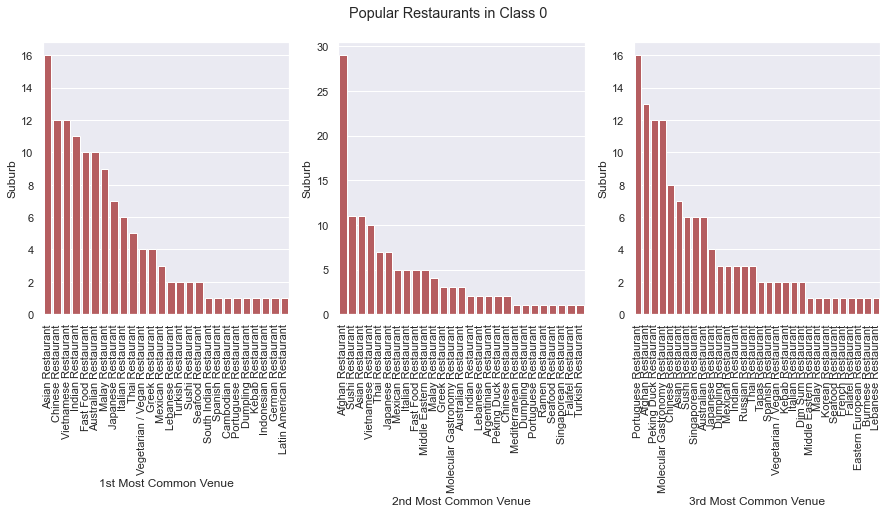

In [50]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# for item in by_school.get_xticklabels():
#     item.set_rotation(90)

sns.set()
fig, axes = plt.subplots(1, 3, figsize=(15, 5), )
fig.suptitle('Popular Restaurants in Class 0')

labels1 = loc_cl_ct1['1st Most Common Venue']
labels2 = loc_cl_ct2['2nd Most Common Venue']
labels3 = loc_cl_ct3['3rd Most Common Venue']

bar1= sns.barplot(ax=axes[0],x='1st Most Common Venue',y='Suburb',data=loc_cl_ct1, color= 'r')
bar2= sns.barplot(ax=axes[1],x='2nd Most Common Venue',y='Suburb',data=loc_cl_ct2, color= 'r')
bar3= sns.barplot(ax=axes[2],x='3rd Most Common Venue',y='Suburb',data=loc_cl_ct3, color= 'r')

bar1.set_xticklabels(labels1, rotation = 90)
bar2.set_xticklabels(labels2, rotation = 90)
bar3.set_xticklabels(labels3, rotation = 90)

# Class 1: Italian/ Afghan Restaurant (Purple)

In [51]:
loc_cl1 = Local_merged.loc[Local_merged['Cluster Labels'] == 1, Local_merged.columns[[1] + list(range(5, Local_merged.shape[1]))]]
loc_cl1

,Suburb,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Carlton,144.969510,1.0,Italian Restaurant,French Restaurant,Yunnan Restaurant,Thai Restaurant,Lebanese Restaurant,Egyptian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Vietnamese Restaurant
11,South Yarra,144.992710,1.0,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Thai Restaurant,Chinese Restaurant,Korean BBQ Restaurant,Lebanese Restaurant,Middle Eastern Restaurant,Portuguese Restaurant
13,Albert Park,144.951260,1.0,Italian Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Indian Restaurant,Thai Restaurant,Fast Food Restaurant,Australian Restaurant,Asian Restaurant,Vietnamese Restaurant,Japanese Restaurant
17,Ripponlea,144.994950,1.0,Molecular Gastronomy Restaurant,Jewish Restaurant,Italian Restaurant,Indian Restaurant,Afghan Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Peking Duck Restaurant
20,St Kilda West,144.974220,1.0,Australian Restaurant,Italian Restaurant,Indian Restaurant,Ramen Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Afghan Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant
31,Fitzroy North,144.983680,1.0,Italian Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Thai Restaurant,Falafel Restaurant,Malay Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Modern European Restaurant
50,Thornbury,145.000920,1.0,Italian Restaurant,Tapas Restaurant,Australian Restaurant,French Restaurant,Peking Duck Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant
53,Craigieburn,144.945480,1.0,Italian Restaurant,Afghan Restaurant,Molecular Gastronomy Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Peking Duck Restaurant,Modern European Restaurant
57,Westmeadows,144.884480,1.0,Italian Restaurant,Chinese Restaurant,Afghan Restaurant,Peking Duck Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Molecular Gastronomy Restaurant
59,Brunswick East,144.975740,1.0,Italian Restaurant,Portuguese Restaurant,Southern / Soul Food Restaurant,Thai Restaurant,Middle Eastern Restaurant,Afghan Restaurant,Peking Duck Restaurant,Ramen Restaurant,Polish Restaurant,Peruvian Restaurant


In [52]:
loc_cl1.shape

(42, 13)

In [53]:
loc_cl = loc_cl1
loc_cl_ct1= loc_cl.groupby('1st Most Common Venue').count()
loc_cl_ct1=loc_cl_ct1.sort_values(by='Suburb',ascending = False)
loc_cl_ct1=loc_cl_ct1.reset_index()
loc_cl_ct1

loc_cl_ct2= loc_cl.groupby('2nd Most Common Venue').count()
loc_cl_ct2=loc_cl_ct2.sort_values(by='Suburb',ascending = False)
loc_cl_ct2=loc_cl_ct2.reset_index()
loc_cl_ct2

loc_cl_ct3= loc_cl.groupby('3rd Most Common Venue').count()
loc_cl_ct3=loc_cl_ct3.sort_values(by='Suburb',ascending = False)
loc_cl_ct3=loc_cl_ct3.reset_index()
loc_cl_ct3

loc_cl_ct3.head()



,3rd Most Common Venue,Suburb,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Afghan Restaurant,7,7,7,7,7,7,7,7,7,7,7,7
1,Molecular Gastronomy Restaurant,4,4,4,4,4,4,4,4,4,4,4,4
2,Singaporean Restaurant,4,4,4,4,4,4,4,4,4,4,4,4
3,Fast Food Restaurant,4,4,4,4,4,4,4,4,4,4,4,4
4,Indian Restaurant,4,4,4,4,4,4,4,4,4,4,4,4


[Text(0, 0, 'Afghan Restaurant'),
 Text(1, 0, 'Molecular Gastronomy Restaurant'),
 Text(2, 0, 'Singaporean Restaurant'),
 Text(3, 0, 'Fast Food Restaurant'),
 Text(4, 0, 'Indian Restaurant'),
 Text(5, 0, 'Portuguese Restaurant'),
 Text(6, 0, 'Mexican Restaurant'),
 Text(7, 0, 'Italian Restaurant'),
 Text(8, 0, 'Chinese Restaurant'),
 Text(9, 0, 'Japanese Restaurant'),
 Text(10, 0, 'Asian Restaurant'),
 Text(11, 0, 'Middle Eastern Restaurant'),
 Text(12, 0, 'Australian Restaurant'),
 Text(13, 0, 'Southern / Soul Food Restaurant'),
 Text(14, 0, 'Thai Restaurant'),
 Text(15, 0, 'Vietnamese Restaurant'),
 Text(16, 0, 'Yunnan Restaurant')]

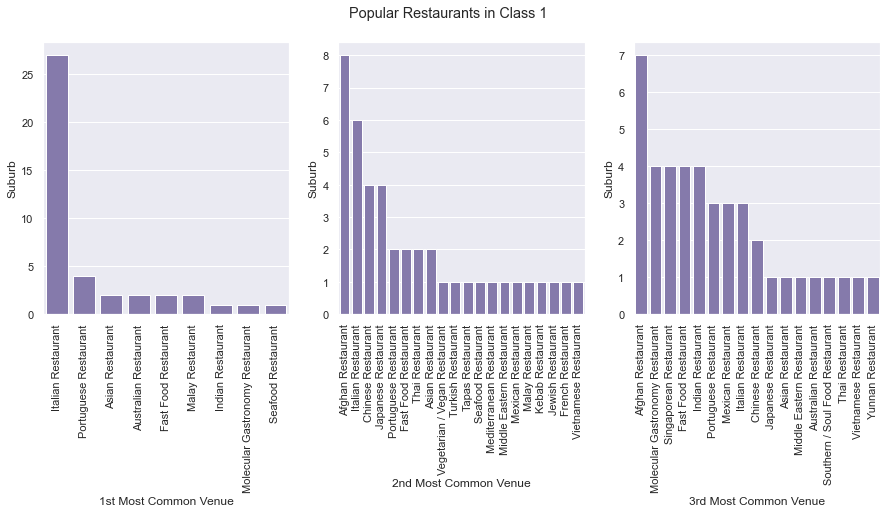

In [54]:
sns.set()
fig, axes = plt.subplots(1, 3, figsize=(15, 5), )
fig.suptitle('Popular Restaurants in Class 1')

labels1 = loc_cl_ct1['1st Most Common Venue']
labels2 = loc_cl_ct2['2nd Most Common Venue']
labels3 = loc_cl_ct3['3rd Most Common Venue']

bar1= sns.barplot(ax=axes[0],x='1st Most Common Venue',y='Suburb',data=loc_cl_ct1, color= 'm')
bar2= sns.barplot(ax=axes[1],x='2nd Most Common Venue',y='Suburb',data=loc_cl_ct2, color= 'm')
bar3= sns.barplot(ax=axes[2],x='3rd Most Common Venue',y='Suburb',data=loc_cl_ct3, color= 'm')

bar1.set_xticklabels(labels1, rotation = 90)
bar2.set_xticklabels(labels2, rotation = 90)
bar3.set_xticklabels(labels3, rotation = 90)

# Class 2:Middle East Restaurant (Blue)

In [55]:
loc_cl2 = Local_merged.loc[Local_merged['Cluster Labels'] == 2, Local_merged.columns[[1] + list(range(5, Local_merged.shape[1]))]]
loc_cl2

,Suburb,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,North Melbourne,144.94609,2.0,Malay Restaurant,Middle Eastern Restaurant,Afghan Restaurant,Singaporean Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Peking Duck Restaurant
63,Glenroy,144.92057,2.0,Fast Food Restaurant,Middle Eastern Restaurant,Peking Duck Restaurant,Seafood Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Afghan Restaurant
72,Thomastown,145.01431,2.0,Middle Eastern Restaurant,Halal Restaurant,Afghan Restaurant,Peking Duck Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Molecular Gastronomy Restaurant
114,Belgrave Heights,145.34959,2.0,Middle Eastern Restaurant,Afghan Restaurant,Singaporean Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Peking Duck Restaurant
129,Hallam,145.27902,2.0,Middle Eastern Restaurant,Afghan Restaurant,Singaporean Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Peking Duck Restaurant
171,Mount Eliza,145.09025,2.0,Middle Eastern Restaurant,Afghan Restaurant,Singaporean Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Peking Duck Restaurant
217,Ascot Vale,144.91556,2.0,Indian Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Peking Duck Restaurant,Afghan Restaurant
224,Strathmore,144.92204,2.0,Middle Eastern Restaurant,Thai Restaurant,Fast Food Restaurant,Afghan Restaurant,Peking Duck Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant
225,Travancore,144.93285,2.0,Fast Food Restaurant,Middle Eastern Restaurant,Peking Duck Restaurant,Seafood Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Afghan Restaurant


In [56]:
loc_cl2.shape

(9, 13)

In [57]:
loc_cl = loc_cl2
loc_cl_ct1= loc_cl.groupby('1st Most Common Venue').count()
loc_cl_ct1=loc_cl_ct1.sort_values(by='Suburb',ascending = False)
loc_cl_ct1=loc_cl_ct1.reset_index()
loc_cl_ct1

loc_cl_ct2= loc_cl.groupby('2nd Most Common Venue').count()
loc_cl_ct2=loc_cl_ct2.sort_values(by='Suburb',ascending = False)
loc_cl_ct2=loc_cl_ct2.reset_index()
loc_cl_ct2

loc_cl_ct3= loc_cl.groupby('3rd Most Common Venue').count()
loc_cl_ct3=loc_cl_ct3.sort_values(by='Suburb',ascending = False)
loc_cl_ct3=loc_cl_ct3.reset_index()
loc_cl_ct3

loc_cl_ct1.head()



,1st Most Common Venue,Suburb,Longitude,Cluster Labels,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Middle Eastern Restaurant,5,5,5,5,5,5,5,5,5,5,5,5
1,Fast Food Restaurant,2,2,2,2,2,2,2,2,2,2,2,2
2,Indian Restaurant,1,1,1,1,1,1,1,1,1,1,1,1
3,Malay Restaurant,1,1,1,1,1,1,1,1,1,1,1,1


[Text(0, 0, 'Singaporean Restaurant'),
 Text(1, 0, 'Afghan Restaurant'),
 Text(2, 0, 'Peking Duck Restaurant'),
 Text(3, 0, 'Fast Food Restaurant'),
 Text(4, 0, 'Molecular Gastronomy Restaurant')]

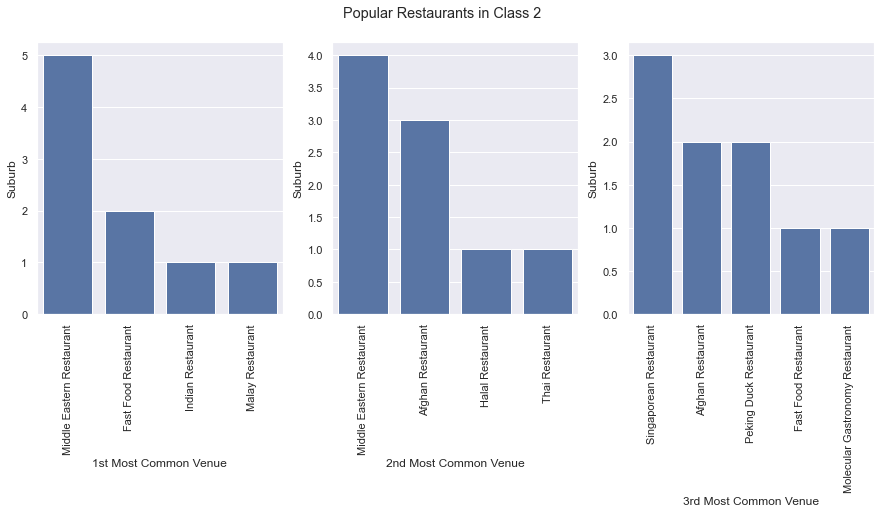

In [58]:
sns.set()
fig, axes = plt.subplots(1, 3, figsize=(15, 5), )
fig.suptitle('Popular Restaurants in Class 2')

labels1 = loc_cl_ct1['1st Most Common Venue']
labels2 = loc_cl_ct2['2nd Most Common Venue']
labels3 = loc_cl_ct3['3rd Most Common Venue']

bar1= sns.barplot(ax=axes[0],x='1st Most Common Venue',y='Suburb',data=loc_cl_ct1, color= 'b')
bar2= sns.barplot(ax=axes[1],x='2nd Most Common Venue',y='Suburb',data=loc_cl_ct2, color= 'b')
bar3= sns.barplot(ax=axes[2],x='3rd Most Common Venue',y='Suburb',data=loc_cl_ct3, color= 'b')

bar1.set_xticklabels(labels1, rotation = 90)
bar2.set_xticklabels(labels2, rotation = 90)
bar3.set_xticklabels(labels3, rotation = 90)

# Class 3: Fast Food (Green)

In [59]:
loc_cl3 = Local_merged.loc[Local_merged['Cluster Labels'] == 3, Local_merged.columns[[1] + list(range(5, Local_merged.shape[1]))]]
loc_cl3

,Suburb,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,Melbourne Airport,144.849340,3.0,Fast Food Restaurant,Spanish Restaurant,Portuguese Restaurant,Middle Eastern Restaurant,Afghan Restaurant,Peruvian Restaurant,Russian Restaurant,Ramen Restaurant,Polish Restaurant,Molecular Gastronomy Restaurant
62,Fawkner,144.962750,3.0,Fast Food Restaurant,Peking Duck Restaurant,Seafood Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Afghan Restaurant,Korean Restaurant
64,Oak Park,144.916980,3.0,Fast Food Restaurant,Peking Duck Restaurant,Seafood Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Afghan Restaurant,Korean Restaurant
65,Diamond Creek,145.157070,3.0,Fast Food Restaurant,Peking Duck Restaurant,Seafood Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Afghan Restaurant,Korean Restaurant
68,Research,145.180360,3.0,Chinese Restaurant,Fast Food Restaurant,Afghan Restaurant,Peruvian Restaurant,Seafood Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peking Duck Restaurant
73,Ashburton,145.077160,3.0,Sushi Restaurant,Fast Food Restaurant,Afghan Restaurant,Peking Duck Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Molecular Gastronomy Restaurant
86,Wantirna,145.229070,3.0,Fast Food Restaurant,Japanese Restaurant,Peking Duck Restaurant,Seafood Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Afghan Restaurant
92,Bayswater North,145.290460,3.0,Fast Food Restaurant,Peking Duck Restaurant,Seafood Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Afghan Restaurant,Korean Restaurant
99,Kilsyth South,145.316530,3.0,Fast Food Restaurant,Peking Duck Restaurant,Seafood Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Afghan Restaurant,Korean Restaurant
116,Lilydale,145.351070,3.0,Fast Food Restaurant,Portuguese Restaurant,Peking Duck Restaurant,Seafood Restaurant,Russian Restaurant,Ramen Restaurant,Polish Restaurant,Peruvian Restaurant,Afghan Restaurant,Korean Restaurant


In [60]:
loc_cl3.shape

(38, 13)

In [61]:
loc_cl = loc_cl3
loc_cl_ct1= loc_cl.groupby('1st Most Common Venue').count()
loc_cl_ct1=loc_cl_ct1.sort_values(by='Suburb',ascending = False)
loc_cl_ct1=loc_cl_ct1.reset_index()
loc_cl_ct1

loc_cl_ct2= loc_cl.groupby('2nd Most Common Venue').count()
loc_cl_ct2=loc_cl_ct2.sort_values(by='Suburb',ascending = False)
loc_cl_ct2=loc_cl_ct2.reset_index()
loc_cl_ct2

loc_cl_ct3= loc_cl.groupby('3rd Most Common Venue').count()
loc_cl_ct3=loc_cl_ct3.sort_values(by='Suburb',ascending = False)
loc_cl_ct3=loc_cl_ct3.reset_index()
loc_cl_ct3

loc_cl_ct1.head()

,1st Most Common Venue,Suburb,Longitude,Cluster Labels,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Fast Food Restaurant,35,35,35,35,35,35,35,35,35,35,35,35
1,Chinese Restaurant,1,1,1,1,1,1,1,1,1,1,1,1
2,Ethiopian Restaurant,1,1,1,1,1,1,1,1,1,1,1,1
3,Sushi Restaurant,1,1,1,1,1,1,1,1,1,1,1,1


[Text(0, 0, 'Seafood Restaurant'),
 Text(1, 0, 'Peking Duck Restaurant'),
 Text(2, 0, 'Afghan Restaurant'),
 Text(3, 0, 'American Restaurant'),
 Text(4, 0, 'Asian Restaurant'),
 Text(5, 0, 'Chinese Restaurant'),
 Text(6, 0, 'Mexican Restaurant'),
 Text(7, 0, 'Peruvian Restaurant'),
 Text(8, 0, 'Portuguese Restaurant')]

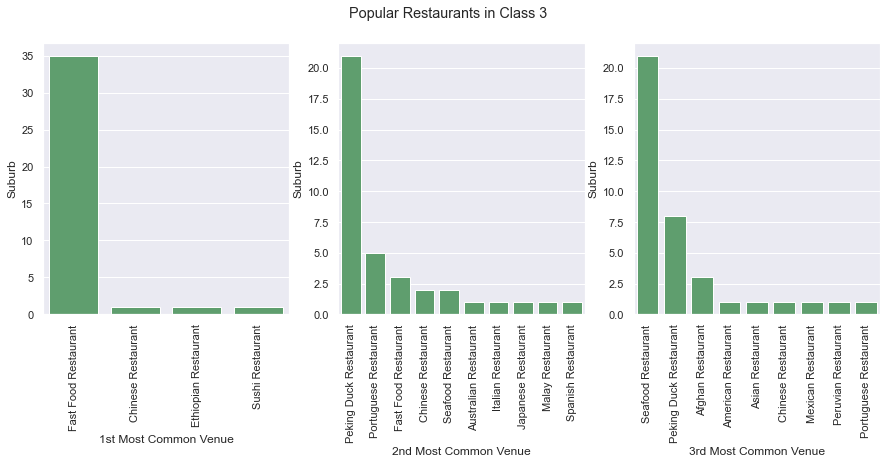

In [62]:
sns.set()
fig, axes = plt.subplots(1, 3, figsize=(15, 5), )
fig.suptitle('Popular Restaurants in Class 3')

labels1 = loc_cl_ct1['1st Most Common Venue']
labels2 = loc_cl_ct2['2nd Most Common Venue']
labels3 = loc_cl_ct3['3rd Most Common Venue']

bar1= sns.barplot(ax=axes[0],x='1st Most Common Venue',y='Suburb',data=loc_cl_ct1, color= 'g')
bar2= sns.barplot(ax=axes[1],x='2nd Most Common Venue',y='Suburb',data=loc_cl_ct2, color= 'g')
bar3= sns.barplot(ax=axes[2],x='3rd Most Common Venue',y='Suburb',data=loc_cl_ct3, color= 'g')

bar1.set_xticklabels(labels1, rotation = 90)
bar2.set_xticklabels(labels2, rotation = 90)
bar3.set_xticklabels(labels3, rotation = 90)

# Class 4: Thai restaurant (orange).

In [63]:
loc_cl4 = Local_merged.loc[Local_merged['Cluster Labels'] == 4, Local_merged.columns[[1] + list(range(5, Local_merged.shape[1]))]]
loc_cl4

,Suburb,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Kensington,144.927540,4.0,Japanese Restaurant,Thai Restaurant,Afghan Restaurant,Molecular Gastronomy Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Peking Duck Restaurant,Middle Eastern Restaurant
38,Heidelberg Heights,145.050470,4.0,Indian Restaurant,Thai Restaurant,Afghan Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Peking Duck Restaurant,Molecular Gastronomy Restaurant,Modern European Restaurant
42,Macleod,145.073470,4.0,Thai Restaurant,Afghan Restaurant,Molecular Gastronomy Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Peking Duck Restaurant,Modern European Restaurant
43,Montmorency,145.120770,4.0,Thai Restaurant,Chinese Restaurant,Afghan Restaurant,Peking Duck Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Molecular Gastronomy Restaurant
47,Macleod,145.073470,4.0,Thai Restaurant,Afghan Restaurant,Molecular Gastronomy Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Peking Duck Restaurant,Modern European Restaurant
75,Canterbury,145.080830,4.0,Thai Restaurant,Afghan Restaurant,Molecular Gastronomy Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Peking Duck Restaurant,Modern European Restaurant
76,Glen Iris,145.052220,4.0,Thai Restaurant,Afghan Restaurant,Molecular Gastronomy Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Peking Duck Restaurant,Modern European Restaurant
93,Croydon,145.280190,4.0,Thai Restaurant,Afghan Restaurant,Molecular Gastronomy Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Peking Duck Restaurant,Modern European Restaurant
95,Croydon North,145.298030,4.0,Thai Restaurant,Afghan Restaurant,Molecular Gastronomy Restaurant,Russian Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Peking Duck Restaurant,Modern European Restaurant
101,Vermont,145.195240,4.0,Indian Restaurant,Thai Restaurant,Afghan Restaurant,Ramen Restaurant,Portuguese Restaurant,Polish Restaurant,Peruvian Restaurant,Peking Duck Restaurant,Molecular Gastronomy Restaurant,Modern European Restaurant


In [64]:
loc_cl4.shape

(16, 13)

In [65]:
loc_cl = loc_cl4
loc_cl_ct1= loc_cl.groupby('1st Most Common Venue').count()
loc_cl_ct1=loc_cl_ct1.sort_values(by='Suburb',ascending = False)
loc_cl_ct1=loc_cl_ct1.reset_index()
loc_cl_ct1

loc_cl_ct2= loc_cl.groupby('2nd Most Common Venue').count()
loc_cl_ct2=loc_cl_ct2.sort_values(by='Suburb',ascending = False)
loc_cl_ct2=loc_cl_ct2.reset_index()
loc_cl_ct2

loc_cl_ct3= loc_cl.groupby('3rd Most Common Venue').count()
loc_cl_ct3=loc_cl_ct3.sort_values(by='Suburb',ascending = False)
loc_cl_ct3=loc_cl_ct3.reset_index()
loc_cl_ct3

loc_cl_ct1.head()

,1st Most Common Venue,Suburb,Longitude,Cluster Labels,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Thai Restaurant,12,12,12,12,12,12,12,12,12,12,12,12
1,Indian Restaurant,3,3,3,3,3,3,3,3,3,3,3,3
2,Japanese Restaurant,1,1,1,1,1,1,1,1,1,1,1,1


[Text(0, 0, 'Molecular Gastronomy Restaurant'),
 Text(1, 0, 'Afghan Restaurant')]

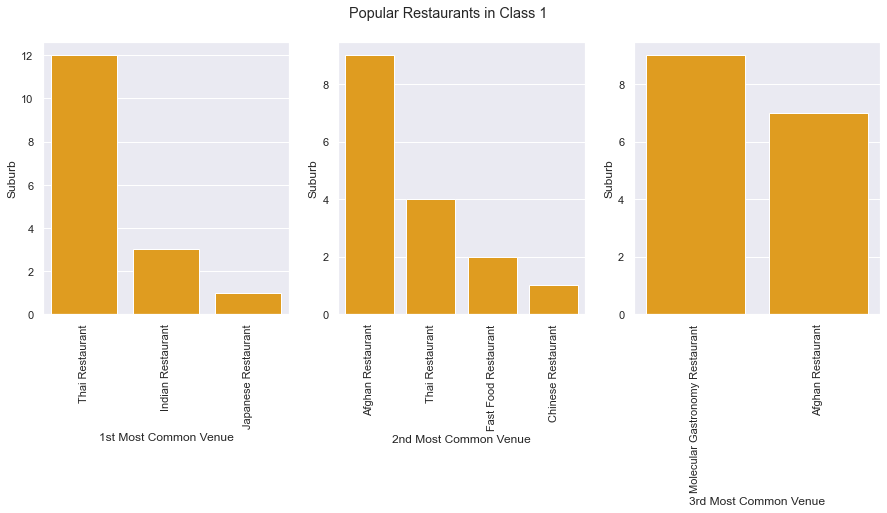

In [66]:
sns.set()
fig, axes = plt.subplots(1, 3, figsize=(15, 5), )
fig.suptitle('Popular Restaurants in Class 1')

labels1 = loc_cl_ct1['1st Most Common Venue']
labels2 = loc_cl_ct2['2nd Most Common Venue']
labels3 = loc_cl_ct3['3rd Most Common Venue']

bar1= sns.barplot(ax=axes[0],x='1st Most Common Venue',y='Suburb',data=loc_cl_ct1, color= 'orange')
bar2= sns.barplot(ax=axes[1],x='2nd Most Common Venue',y='Suburb',data=loc_cl_ct2, color= 'orange')
bar3= sns.barplot(ax=axes[2],x='3rd Most Common Venue',y='Suburb',data=loc_cl_ct3, color= 'orange')

bar1.set_xticklabels(labels1, rotation = 90)
bar2.set_xticklabels(labels2, rotation = 90)
bar3.set_xticklabels(labels3, rotation = 90)